# Polinomial Regression
Trying to imitate a Polynomial Funtion with the help of Tensorflow and Its Gradient Descent Optimiser

In [259]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf

Creating a Polynomial Function
---

In [260]:
# We will try to learn this Function

def polynomialfunc(val):
    return (np.power(val,2) * 7) + (np.power(val,3)*6) + (np.power(val,4) * - 9 ) + 5.789

Sampling Data
---


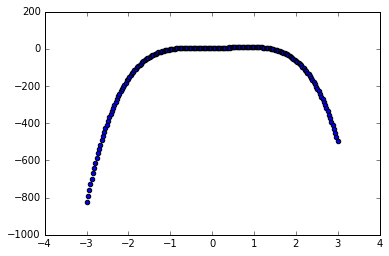

In [261]:
# Creating Sample Data of the given function

fig, ax = plt.subplots(1, 1)
xs = np.linspace(-3,3, 200)
ys = polynomialfunc(xs) + np.random.uniform(-0.5, 0.5, 200)
ax.scatter(xs, ys)
fig.show()

Creating the Model
---

In [262]:
X = tf.placeholder(tf.float32 , shape=[None])
Y = tf.placeholder(tf.float32 , shape=[None])

W0 = tf.Variable( tf.random_normal([1]) ,dtype= tf.float32 , name="bias"  )
W1 = tf.Variable( tf.random_normal([1]) ,dtype= tf.float32 ,name="weight1" )
W2 = tf.Variable( tf.random_normal([1]) ,dtype= tf.float32 , name = "weight2" )
#W3 = tf.Variable( tf.random_normal([1]),dtype= tf.float32 , name = "weight3" )
#W4 = tf.Variable( tf.random_normal([1]),dtype= tf.float32 , name = "weight4" )

# Degree 2 
#model = tf.add(tf.add(W0 , (W1 * X)) , ( tf.pow(X,2) * W2 ))

# Degree 3 
#model = tf.add(tf.add(tf.add(W0 , (W1 * X)) , ( tf.pow(X,2) * W2 )) ,( tf.pow(X,3) * W3 ))

# Degree 4
model = tf.add(tf.add(tf.add(tf.add(W0 , (W1 * X)) , ( tf.pow(X,2) * W2 )) ,( tf.pow(X,3) * W3 )) , (tf.pow(X,4) * W4))


cost = tf.reduce_mean(tf.squared_difference(model , Y))

learning_rate = 0.001

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


Teaching the Model
---

In [263]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(1001):
    c , _ = sess.run([cost, optimizer] , feed_dict={X: xs , Y : ys })
    if(i%100 == 0):print c

64670.1
82.2157
41.0178
20.51
10.2987
5.21178
2.67553
1.40909
0.775037
0.456083
0.294309


Testing The Model
---

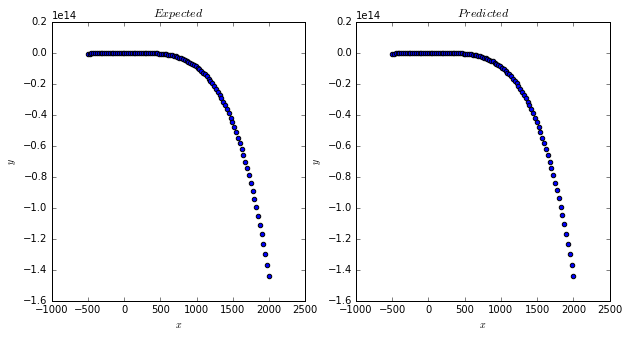

In [266]:
validate = np.linspace(-500,2000,100)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
ax1.set_title("$Expected$")
ax2.set_title("$Predicted$")
ax1.set_xlabel("$x$")
ax2.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax2.set_ylabel("$y$")
ax2.scatter(validate, sess.run(model , feed_dict={X: validate}) )
ax1.scatter(validate , polynomialfunc(validate))
fig.show()


Conclusion
--

Currently we have $4$ weights one for each power of the input data , where the power to 0 acts as the $bias$ <br>
The formula for the model given as $ (X^4 * W_4) + (X^3 * W_3) + (X^2 * W_2) + (X * W_1) + b  $


The Implementation is quite accurate , Further testing will follow in the upcomming notebooks